In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
x=[]
y=[]
x0=[]
x1=[]
data=pd.read_csv("exam.csv",header=None)
print(data)
c=data[2]
for i in range(0,len(c)):
    if(c[i]==0):
        x0.append([data[0][i],data[1][i]])
    if(c[i]==1):
        x1.append([data[0][i],data[1][i]])
    x.append([data[0][i],data[1][i]])
    y.append([data[2][i]])

one=np.ones([len(x),1])
x=np.concatenate((one,x),axis=1)
x=(x-np.mean(x))/np.std(x)
y=np.array(y)
x0=np.array(x0)
x1=np.array(x1)
x0=(x0-np.mean(x0))/np.std(x0)
x1=(x1-np.mean(x1))/np.std(x1)

            0          1  2
0   34.623660  78.024693  0
1   30.286711  43.894998  0
2   35.847409  72.902198  0
3   60.182599  86.308552  1
4   79.032736  75.344376  1
5   45.083277  56.316372  0
6   61.106665  96.511426  1
7   75.024746  46.554014  1
8   76.098787  87.420570  1
9   84.432820  43.533393  1
10  95.861555  38.225278  0
11  75.013658  30.603263  0
12  82.307053  76.481963  1
13  69.364589  97.718692  1
14  39.538339  76.036811  0
15  53.971052  89.207350  1
16  69.070144  52.740470  1
17  67.946855  46.678574  0
18  70.661510  92.927138  1
19  76.978784  47.575964  1
20  67.372028  42.838438  0
21  89.676776  65.799366  1
22  50.534788  48.855812  0
23  34.212061  44.209529  0
24  77.924091  68.972360  1
25  62.271014  69.954458  1
26  80.190181  44.821629  1
27  93.114389  38.800670  0
28  61.830206  50.256108  0
29  38.785804  64.995681  0
..        ...        ... ..
70  32.722833  43.307173  0
71  64.039320  78.031688  1
72  72.346494  96.227593  1
73  60.457886  73.09

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=.3)
theta = np.matrix(np.zeros(3))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#set gradient parameters
alpha = 0.01
iters = 1000

(70, 3) (30, 3) (70, 1) (30, 1)


parameters after gradient descent= [[-0.01708493  0.11274204  0.10827061]]


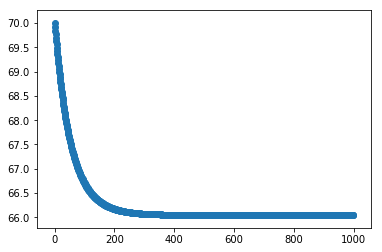

correct predictions out of 30 test points is  21
Accuracy = 70.0 %


In [4]:
## Batch Gradient Descent ##
var=100
def gradientDescent(X,Y,theta,iters,alpha):
    cost=[]
    for i in range(0,iters):
        hypothesis=X*theta.T
        hypothesis=1/(1+np.exp((-1)*hypothesis))
        temp=np.log2(hypothesis)
        temp1=np.log2(1-hypothesis)
        v1=(-1)*(np.matmul(Y.T,temp))
        v2=(-1)*(np.matmul((1-Y).T,temp1))
        loss=hypothesis-Y
        fvalue=v1+v2
        cost.append(v1+v2)
        #if i>0:
            #print("iteration=",i,"| cost=",cost[i])
        gradient=(loss.T*X)/len(X)
        theta=theta-(alpha*(gradient+var/len(X)*theta))
    return theta,cost

g,cost=gradientDescent(x_train,y_train,theta,iters,alpha)
print("parameters after gradient descent=",g)

it=np.arange(0,iters)
plt.plot(it,np.squeeze(cost))
plt.scatter(it,np.squeeze(cost))
plt.show()



##calculating sum of squared error of the test data
tempy=np.matmul(x_test,g.transpose())
tempy=1/(1+np.exp((-1)*tempy))
tempy=np.where(tempy>=0.5,1,0)
tempy=np.squeeze(tempy)
count=0
for i in range(0,len(tempy)):
    if(tempy[i]==y_test[i]):
        count=count+1
print("correct predictions out of 30 test points is ",count)
print("Accuracy =",count/len(tempy)*100,"%")

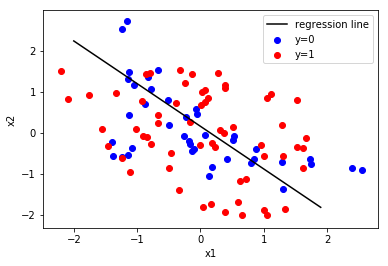

In [6]:
plt.scatter([x0[:,0]],[x0[:,1]],c='b',label='y=0')
plt.scatter([x1[:,0]],[x1[:,1]],c='r',label='y=1')
x3=np.arange(-2,2,0.1)
x4=-(g[0,0]+g[0,1]*x3)/g[0,2]
plt.plot(x3,x4,c='k',label='regression line')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()